In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve,classification_report,auc
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
data.shape

(44919, 5)

In [12]:
data = data.drop(["title", "subject","date"], axis = 1)

In [14]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [50]:
data.dtypes

text     object
class     int64
dtype: object

In [16]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

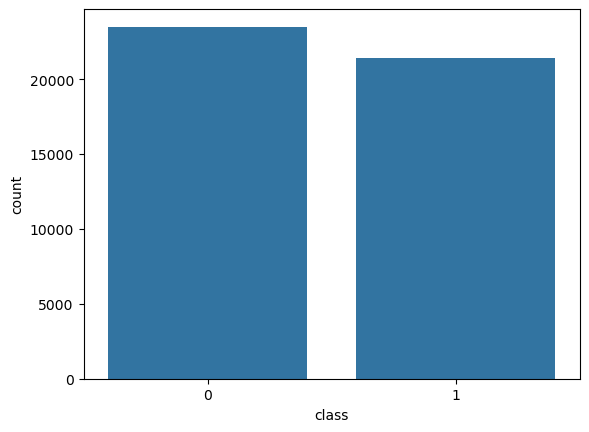

In [18]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [22]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.9 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 365.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 438.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 438.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 450.6 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/299.9 kB 622.7 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/299.9 kB 689.2 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/299.9 kB 741.6 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 742.8 kB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [28]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [55:20<00:00, 13.53it/s]  


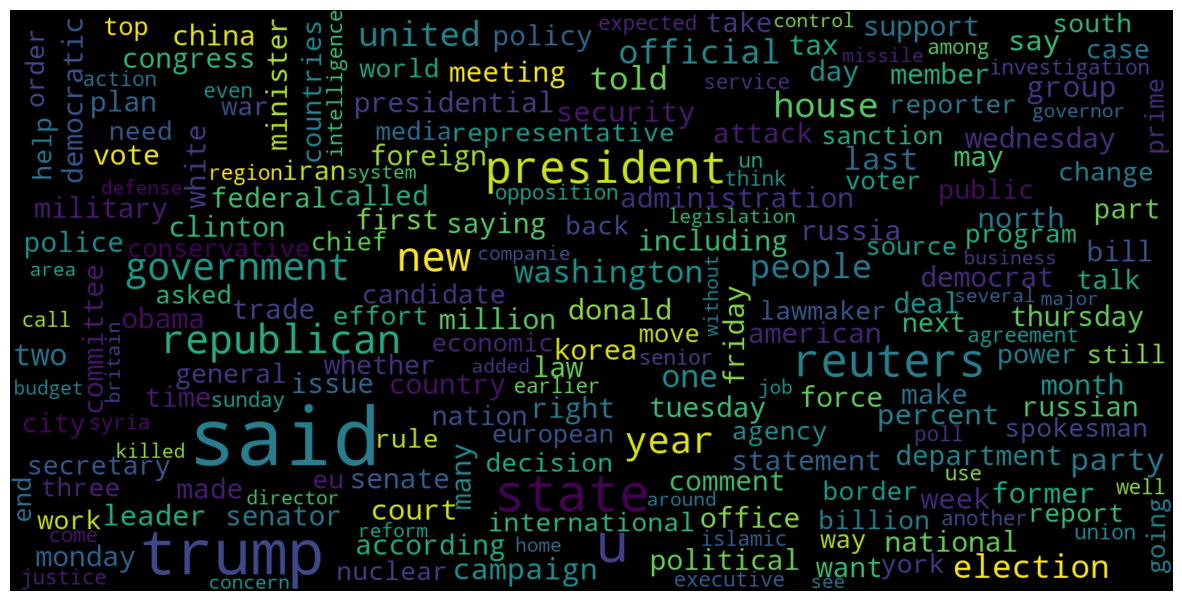

In [30]:
# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

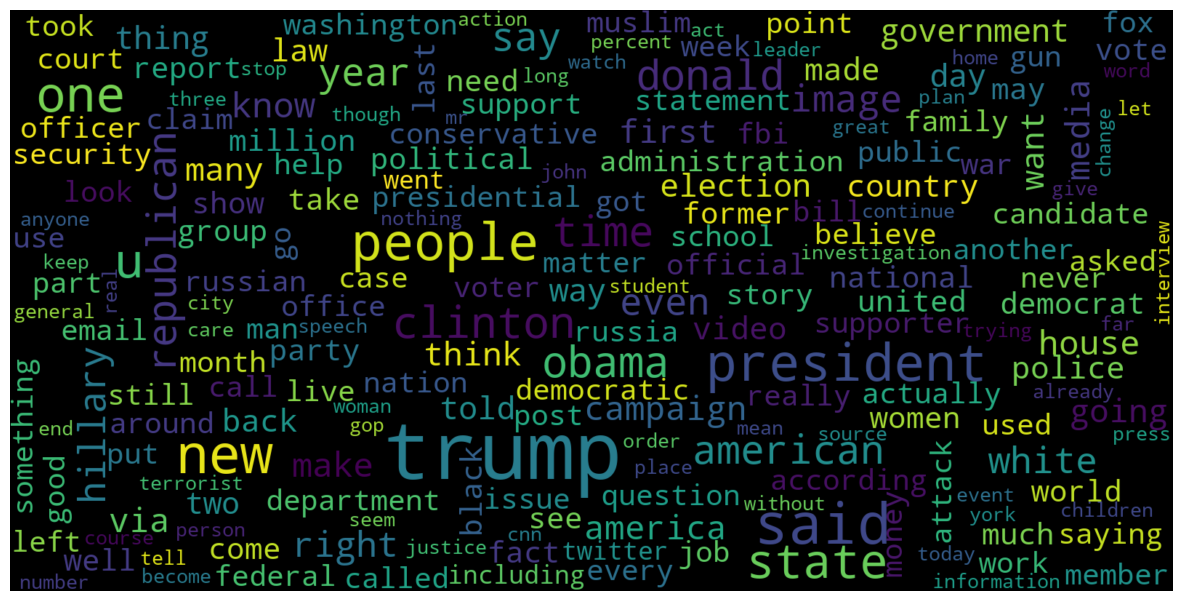

In [32]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

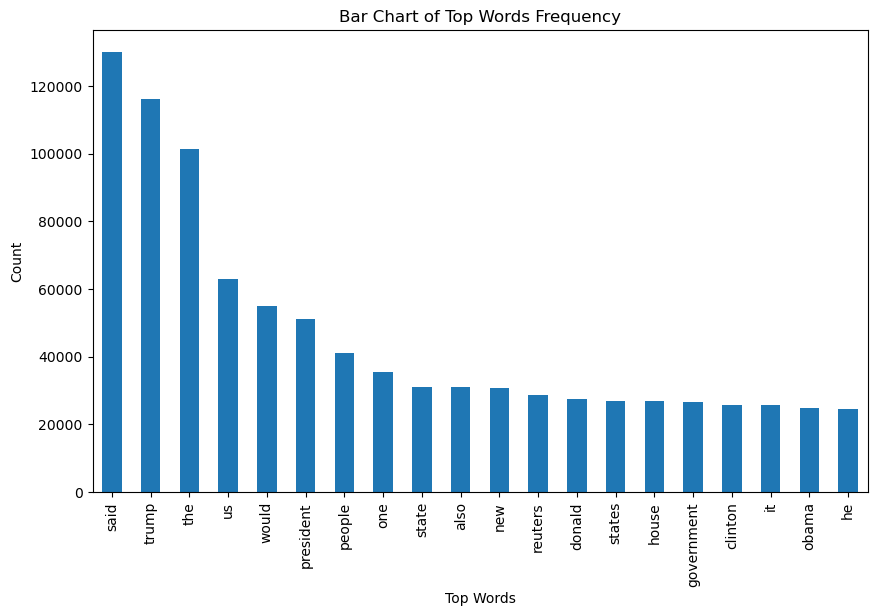

In [34]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                    test_size=0.25)

In [72]:

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [76]:


model_L = LogisticRegression()
model_L.fit(x_train, y_train)

y_train_pred_L=model_L.predict(x_train)
y_test_pred_L=model_L.predict(x_test)

# testing the model
print(accuracy_score(y_train,y_train_pred_L))
print(accuracy_score(y_test, y_test_pred_L))

0.9940633441182581
0.9894033837934105


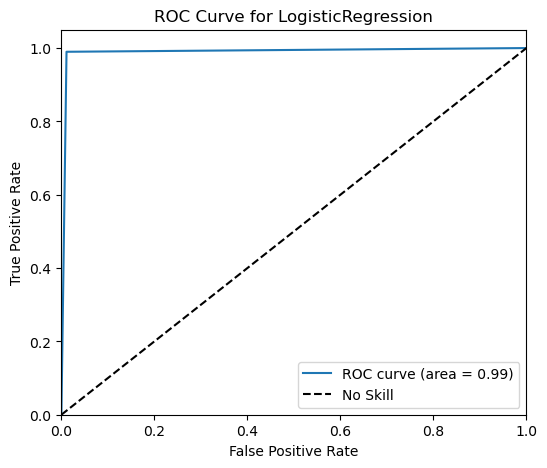

In [78]:
fpr, tpr, thresholds = roc_curve (y_test, y_test_pred_L)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.margins(0.5)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

In [86]:

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
# testing the model
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9999703167205913
0.9954585930543188


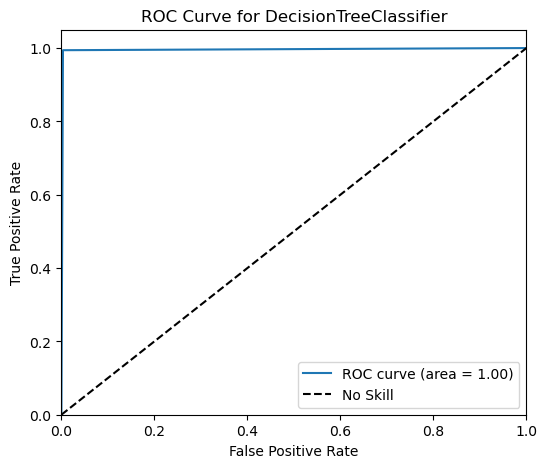

In [88]:
fpr, tpr, thresholds = roc_curve (y_test, y_test_pred)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.margins(0.5)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

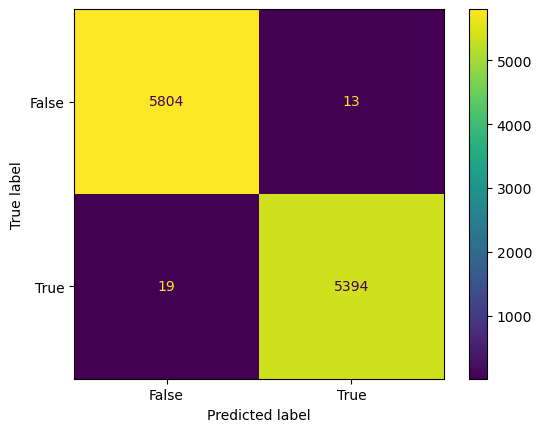

In [44]:
# Confusion matrix of Results from Decision Tree classification
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()